--Guilherme Frutuoso de Almeida--

guilhermefa@alu.ufc.br

## Esse documento colab refere-se a análise de dados do desafio CIENTISTA DE DADOS

Antes de prosseguir, queria agradecer pela oportunidade. Tenho muito apreço por instuições como a de vocês que permitem estudantes e pesquisadores demostrarem seu trabalho de maneira direta e prática. 

Durante o processo de análise, vou, primeiramente, construir uma sub-rotina de ELT(Extract, Load & Transform).
Logo após, vou começar a mostrar e explicar os predicados estatísticos dos dados, tanto textualmente como vizualmente. 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

Bibliotecas - Python

In [7]:
!python --version

Python 3.8.10


In [4]:
pd.__version__

'1.21.6'

In [5]:
np.__version__

'1.21.6'

Função de extração

In [32]:
def extract_data_csv(file_name):
  df = pd.read_csv(file_name + ".csv")

  return df

df = extract_data_csv("desafio_manutencao_preditiva_treino")
df

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


Funções de limpeza de dados

In [33]:
def remove_duplicates(df):
  df = df.drop_duplicates(keep=False)
  df = pd.DataFrame(df)

  return df

def replace_nan_values(df):
  df = df.apply(lambda x: x.fillna(x.mean()),axis=0)
  
  return df

def remove_outliers(df):
  for col in df.iloc[:, :8]:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)

    df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
    df = pd.DataFrame(df_filtered)

  return df

def return_clean_dataframe(df=extract_data_csv("desafio_manutencao_preditiva_treino")):
  df = replace_nan_values(df)
  df = remove_duplicates(df)
  df = remove_outliers(df)


  return df

df

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...,...,...
6662,9995,L57174,L,298.8,308.3,1634,27.9,12,No Failure
6663,9996,M24855,M,298.8,308.4,1604,29.5,14,No Failure
6664,9997,H39410,H,298.9,308.4,1632,31.8,17,No Failure
6665,9999,H39412,H,299.0,308.7,1408,48.5,25,No Failure


Após a vizualização do dataframe é evidente que a coluna que aclopa as labels precisa ser alterada. Dados categóricos são de má valência para modelos de aprendizagem. É necessário fazer a transformação de dados categóricos para numéricos. 

Utilizarei o método da biblioteca Pandas chamado get_dummies

In [41]:
def get_dummies_function(df, col):
  dummies = pd.get_dummies(df[col])

  df = df.drop(col, axis='columns')

  merged = pd.concat([df, dummies], axis='columns')

  return merged

df = get_dummies_function(df, "failure_type")
df.tail(30)

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
6637,9962,L57141,L,298.2,307.9,1399,54.9,139,0,1,0,0,0,0
6638,9963,L57142,L,298.2,307.9,1429,49.4,141,0,1,0,0,0,0
6639,9964,L57143,L,298.3,307.9,1435,39.9,143,0,1,0,0,0,0
6640,9966,L57145,L,298.3,307.9,1703,28.9,147,0,1,0,0,0,0
6641,9967,L57146,L,298.3,307.9,1507,41.2,149,0,1,0,0,0,0
6642,9969,L57148,L,298.4,308.0,1605,32.4,154,0,1,0,0,0,0
6643,9970,L57149,L,298.4,308.1,1491,50.0,156,0,1,0,0,0,0
6644,9971,H39384,H,298.4,308.1,1891,24.7,158,0,1,0,0,0,0
6645,9972,H39385,H,298.5,308.2,1563,44.6,163,0,1,0,0,0,0
6646,9973,L57152,L,298.6,308.2,1390,51.4,168,0,1,0,0,0,0


##Analisando e demostrando métricas estatísticas

1 - Medidas de tendências centrais e dispersão

2- A covariância é uma medida da relação entre a variabilidade de 2 variáveis - a covariância depende da escala porque não é padronizada

A correlação é uma relação entre a variabilidade de 2 variáveis - a correlação é padronizada, tornando-a independente da escala

In [47]:
def dispersion_metrics(df, col):
  mean = df[col].mean()
  var = df[col].var()
  std = df[col].std()

  mean = str(mean)
  var = str(var)
  std = str(std)

  print("Média: " + mean + " Variância: " + var + " Desvio Padrão: " + std)

def cov_corr(df):
  cov = df.cov()
  corr = df.corr()

  cov = str(cov)
  corr = str(corr)

  print("Correlation: " + corr + " Covariance: " + cov)

dispersion_metrics(df, "torque_nm")
cov_corr(df)

Média: 40.05851207439628 Variância: 99.01850351631833 Desvio Padrão: 9.950804164303422
Correlation:                                udi  air_temperature_k  process_temperature_k  \
udi                       1.000000           0.118146               0.326561   
air_temperature_k         0.118146           1.000000               0.875724   
process_temperature_k     0.326561           0.875724               1.000000   
rotational_speed_rpm      0.004286           0.035903               0.033379   
torque_nm                -0.003398          -0.023257              -0.024457   
tool_wear_min            -0.002502           0.021078               0.020298   
Heat Dissipation Failure -0.021655           0.136805               0.056156   
No Failure                0.015046          -0.081219              -0.037793   
Overstrain Failure        0.002824          -0.001633               0.004794   
Power Failure            -0.015946          -0.005074              -0.007851   
Random Failures     

Naturalmente, é muito mais palpável apresentar e explanar essas medidas e relações de maneira gráfica.

In [ ]:
import seaborn as sns

def see_boxplot_graph(df, x, y):
  df.boxplot(by =x, column =[y], grid = False)

def see_scatterplot_matrix(df, dimensions, class_):
  import plotly.express as px

  fig = px.scatter_matrix(df,
    dimensions= dimensions,
    color=class_)
  
  fig.show()

def correlation_matrix(cols):

  cm = np.corrcoef(df[cols].values.T)
  sns.set(font_scale=1.5)

  hm = sns.heatmap(cm,
  cbar=True,
  annot=True,
  square=True,
  fmt='.2f',
  annot_kws={'size': 15},
  yticklabels=cols,
  xticklabels=cols)

  plt.show()



In [51]:
see_scatterplot_matrix(df, ['air_temperature_k','process_temperature_k'], "No Failure")

In [52]:
see_scatterplot_matrix(df, ['rotational_speed_rpm',	'torque_nm',	'tool_wear_min'], "No Failure")

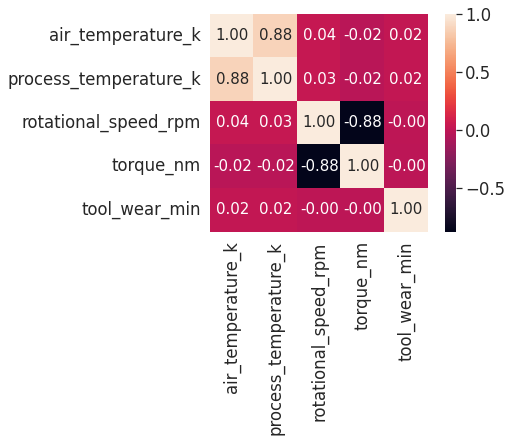

In [50]:
correlation_matrix(['air_temperature_k','process_temperature_k', 'rotational_speed_rpm',	'torque_nm',	'tool_wear_min'])